# **Import Libraries**

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.utils import resample
from scipy.stats import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from docx import Document
import json
import os

# **Phase 1: Data Preprocessing and Feature Engineering**

> Read the Train Flights Data

In [ ]:
trainPath = 'ML-Proj-Dataset/Train'
flights = pd.DataFrame()

for i in sorted([f for f in os.listdir(trainPath) if f.endswith('.docx')], key = lambda x: int(x.split('.')[0])):
	if i.endswith('.docx'):
		file = os.path.join(trainPath, i)
		doc = Document(file)
		text = []
		
		for p in doc.paragraphs:
			text.append(p.text)
			
		string = ''.join(text)
		data = json.loads(string)
		
		if data:
			temp = pd.json_normalize(data)
			flights = pd.concat([flights, temp], ignore_index = True) 

flights.to_csv('Data/train.csv', index = False)

In [62]:
train = pd.read_csv('Data/train.csv')
train

C:\Users\safwa\AppData\Local\Temp\ipykernel_13120\388118682.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


,type,status,departure.iataCode,departure.icaoCode,departure.terminal,departure.scheduledTime,departure.estimatedTime,departure.actualTime,departure.estimatedRunway,departure.actualRunway,...,codeshared.airline.iataCode,codeshared.airline.icaoCode,codeshared.flight.number,codeshared.flight.iataNumber,codeshared.flight.icaoNumber,arrival.gate,departure.gate,arrival.actualTime,arrival.estimatedRunway,arrival.actualRunway
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,departure,active,lhe,opla,NaN,2023-07-18t15:05:00.000,2023-07-18t15:05:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,departure,active,lhe,opla,NaN,2023-07-23t09:50:00.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,departure,active,lhe,opla,m,2023-07-26t23:30:00.000,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,2023-07-26t23:51:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,departure,active,lhe,opla,m,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,isb,opis,NaN,2024-07-06t19:00:00.000,2024-07-06t19:00:00.000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,2024-07-06t19:25:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51568,departure,active,isb,opis,NaN,2024-07-06t19:45:00.000,2024-07-06t19:58:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,b16,b3,NaN,NaN,NaN
51569,departure,active,isb,opis,NaN,2024-07-04t17:00:00.000,2024-07-04t17:00:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51570,departure,active,isb,opis,NaN,2024-07-03t10:00:00.000,2024-07-03t10:00:00.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Read the Test Flights Data

In [145]:
testPath = 'ML-Proj-Dataset/Test'
flights = pd.DataFrame()

for i in sorted([f for f in os.listdir(testPath) if f.endswith('.docx')], key=lambda x: int(x.split('.')[0])):
	if i.endswith('.docx'):
		file = os.path.join(testPath, i)
		doc = Document(file)
		text = []
		
		for p in doc.paragraphs:
			text.append(p.text)
			
		string = ''.join(text)
		data = json.loads(string)
		
		if data:
			temp = pd.json_normalize(data)
			flights = pd.concat([flights, temp], ignore_index = True) 

flights.to_csv('Data/test.csv', index = False)

In [96]:
test = pd.read_csv('Data/test.csv')
test

,flight.number,type,status,departure.iataCode,departure.icaoCode,departure.scheduledTime,arrival.iataCode,arrival.icaoCode,arrival.estimatedTime
0,4361,departure,active,lhe,opla,2024-05-14t00:20:00.000,dxb,omdb,2024-05-14t00:20:00.000
1,1876,departure,active,lhe,opla,2024-05-07t04:15:00.000,ruh,oerk,2024-05-07t04:15:00.000
2,6030,departure,active,lhe,opla,2024-05-09t03:10:00.000,doh,othh,2024-05-09t03:10:00.000
3,739,departure,active,lhe,opla,2024-05-12t02:50:00.000,jed,oejn,2024-05-12t02:50:00.000
4,3932,departure,active,lhe,opla,2024-05-16t04:35:00.000,auh,omaa,2024-05-16t04:35:00.000
...,...,...,...,...,...,...,...,...,...
12909,615,departure,active,isb,opis,2024-06-23t09:30:00.000,doh,othh,2024-06-23t09:30:00.000
12910,725,departure,active,isb,opis,2024-06-25t09:50:00.000,ruh,oerk,2024-06-25t10:45:00.000
12911,211,departure,active,isb,opis,2024-06-22t15:35:00.000,dxb,omdb,2024-06-22t15:58:00.000
12912,207,departure,active,isb,opis,2024-06-19t17:00:00.000,khi,opkc,2024-06-19t18:00:00.000


> Read the Weather Data

In [147]:
def correctWeather(row, columns):
	dateData = []
	time = str(row['Time']).split()

	month = time[0]
	dates = time[1:]

	for i, date in enumerate(dates):
		data = {'Date': f"{month} {date}"}
		
		for col in columns[1:]:
			cell = row[col]
			
			if isinstance(cell, str):
				values = cell.split()
				
				if col == 'Precipitation (in)':
					numValues = [float(v) for v in values if v.replace('.', '', 1).isdigit()]
					
					if i < len(numValues):
						data[col] = numValues[i]
				else:
					numValues = [float(v) for v in values if v.replace('.', '', 1).isdigit()]

					if len(numValues) >= 3 and i * 3 + 2 < len(numValues):
						data[f'{col} Max'] = numValues[i * 3]
						data[f'{col} Avg'] = numValues[i * 3 + 1]
						data[f'{col} Min'] = numValues[i * 3 + 2]

		dateData.append(data)
	return dateData

In [148]:
weatherPath = 'ML-Proj-Dataset/Weather'
output = 'ML-Proj-Dataset/CleanedWeather'
year = 2023

if not os.path.exists(output):
    os.makedirs(output)

for i in sorted(os.listdir(weatherPath)):
    if i.endswith('.xlsx'):
        path = os.path.join(weatherPath, i)
        flights = pd.read_excel(path)
        tempRows = []
        
        for _, row in flights.iterrows():
            newRows = correctWeather(row, flights.columns)
            tempRows.extend(newRows)

        newDF = pd.DataFrame(tempRows)
        outFile = os.path.join(output, os.path.splitext(i)[0] + '_cleaned.xlsx')
        newDF.to_excel(outFile, index=False)

In [149]:
weather = pd.DataFrame()
outFiles = sorted([f for f in os.listdir(output) if f.endswith('.xlsx')], key=lambda x: int(x.split('_')[0]))

for f in outFiles:
    paths = os.path.join(output, f)
    flights = pd.read_excel(paths)
    weather = pd.concat([weather, flights], ignore_index = True)
    
dateRange = pd.date_range(start = "2023-07-01", end = "2024-07-14", freq = 'D')

if len(weather) != len(dateRange):
	raise ValueError('The number of rows in the dataframe does not match the date range length')

weather['TimeStamp'] = dateRange
columns = ['TimeStamp'] + [col for col in weather.columns if col != 'TimeStamp']
weather = weather[columns].drop(columns=['Date'], errors='ignore')

weather.to_csv('Data/weather.csv', index = False)

In [97]:
weather = pd.read_csv('Data/weather.csv')
weather

,TimeStamp,Temperature (°F) Max,Temperature (°F) Avg,Temperature (°F) Min,Dew Point (°F) Max,Dew Point (°F) Avg,Dew Point (°F) Min,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in)
0,2023-07-01,97,88.8,81,77,74.5,72,74,63.4,47,14,8.9,5,28.8,28.8,28.7,0
1,2023-07-02,99,91.5,82,79,75.8,75,79,61.3,47,12,6.7,0,28.8,28.8,28.7,0
2,2023-07-03,102,91.7,77,81,77.0,73,100,63.7,45,35,11.0,0,28.8,28.8,28.7,0
3,2023-07-04,97,88.5,81,77,74.3,73,79,64.0,47,32,13.0,0,28.8,28.7,28.6,0
4,2023-07-05,86,76.0,68,79,72.9,68,100,90.2,70,40,15.0,5,28.8,28.8,28.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2024-07-10,100,88.2,81,84,76.7,73,94,69.8,50,40,8.6,3,28.9,28.9,28.8,0
376,2024-07-11,100,90.7,81,81,76.8,73,89,65.7,44,12,6.7,3,28.8,28.7,28.6,0
377,2024-07-12,90,79.4,72,82,74.9,72,100,85.5,70,35,14.0,3,28.8,28.7,28.6,0
378,2024-07-13,97,85.5,75,73,71.7,70,94,65.2,41,12,5.4,0,28.8,28.7,28.6,0


# **Data Integration**

In [ ]:
train['scheduledDate'] = pd.to_datetime(train['departure.scheduledTime']).dt.date
weather['TimeStamp'] = pd.to_datetime(weather['TimeStamp']).dt.date

finalTrain = pd.merge(train, weather, left_on = 'scheduledDate', right_on = 'TimeStamp', how = 'inner')
finalTrain.drop(columns = ['scheduledDate', 'TimeStamp'], inplace = True)

finalTrain.to_csv('Data/mergedTrain.csv', index=False)
finalTrain

,type,status,departure.iataCode,departure.icaoCode,departure.terminal,departure.scheduledTime,departure.estimatedTime,departure.actualTime,departure.estimatedRunway,departure.actualRunway,...,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in)
0,departure,active,lhe,opla,m,2023-07-20t20:50:00.000,2023-07-20t20:00:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,2023-07-20t20:15:00.000,...,89,76.0,63,12,5.3,0,28.9,28.8,28.7,0
1,departure,active,lhe,opla,m,2023-07-20t11:35:00.000,2023-07-20t17:15:00.000,NaN,NaN,NaN,...,89,76.0,63,12,5.3,0,28.9,28.8,28.7,0
2,departure,active,lhe,opla,m,2023-07-20t22:20:00.000,2023-07-20t23:20:00.000,NaN,NaN,NaN,...,89,76.0,63,12,5.3,0,28.9,28.8,28.7,0
3,departure,active,lhe,opla,m,2023-07-20t21:10:00.000,2023-07-20t21:10:00.000,NaN,NaN,NaN,...,89,76.0,63,12,5.3,0,28.9,28.8,28.7,0
4,departure,active,lhe,opla,m,2023-07-20t09:55:00.000,NaN,2023-07-20t10:09:00.000,2023-07-20t10:09:00.000,2023-07-20t10:09:00.000,...,89,76.0,63,12,5.3,0,28.9,28.8,28.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,khi,opkc,m,2024-07-10t02:30:00.000,2024-07-10t02:30:00.000,2024-07-10t02:44:00.000,2024-07-10t02:44:00.000,2024-07-10t02:44:00.000,...,94,69.8,50,40,8.6,3,28.9,28.9,28.8,0
51568,departure,active,isb,opis,NaN,2024-07-10t03:10:00.000,2024-07-10t03:10:00.000,2024-07-10t03:28:00.000,2024-07-10t03:28:00.000,2024-07-10t03:28:00.000,...,94,69.8,50,40,8.6,3,28.9,28.9,28.8,0
51569,departure,active,isb,opis,NaN,2024-07-10t02:10:00.000,2024-07-10t04:25:00.000,NaN,NaN,NaN,...,94,69.8,50,40,8.6,3,28.9,28.9,28.8,0
51570,departure,active,isb,opis,NaN,2024-07-10t04:35:00.000,2024-07-10t05:12:00.000,NaN,NaN,NaN,...,94,69.8,50,40,8.6,3,28.9,28.9,28.8,0


In [98]:
test['scheduledDate'] = pd.to_datetime(test['departure.scheduledTime']).dt.date
weather['TimeStamp'] = pd.to_datetime(weather['TimeStamp']).dt.date

finaltest = pd.merge(test, weather, left_on = 'scheduledDate', right_on = 'TimeStamp', how = 'inner')
finaltest.drop(columns = ['scheduledDate', 'TimeStamp'], inplace = True)

finaltest.to_csv('Data/mergedTest.csv', index=False)
finaltest

,flight.number,type,status,departure.iataCode,departure.icaoCode,departure.scheduledTime,arrival.iataCode,arrival.icaoCode,arrival.estimatedTime,Temperature (°F) Max,...,Humidity (%) Max,Humidity (%) Avg,Humidity (%) Min,Wind Speed (mph) Max,Wind Speed (mph) Avg,Wind Speed (mph) Min,Pressure (in) Max,Pressure (in) Avg,Pressure (in) Min,Precipitation (in)
0,4361,departure,active,lhe,opla,2024-05-14t00:20:00.000,dxb,omdb,2024-05-14t00:20:00.000,104,...,54,33.2,18,23,8.0,0,29.1,29.0,29.0,0
1,3836,departure,active,lhe,opla,2024-05-14t09:55:00.000,doh,othh,2024-05-14t09:55:00.000,104,...,54,33.2,18,23,8.0,0,29.1,29.0,29.0,0
2,500,departure,active,lhe,opla,2024-05-14t12:45:00.000,shj,omsj,2024-05-14t12:45:00.000,104,...,54,33.2,18,23,8.0,0,29.1,29.0,29.0,0
3,186,departure,active,lhe,opla,2024-05-14t18:15:00.000,cmb,vcbi,2024-05-14t18:15:00.000,104,...,54,33.2,18,23,8.0,0,29.1,29.0,29.0,0
4,4359,departure,active,lhe,opla,2024-05-14t14:55:00.000,dxb,omdb,2024-05-14t14:55:00.000,104,...,54,33.2,18,23,8.0,0,29.1,29.0,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,715,departure,active,lhe,opla,2023-11-30t06:35:00.000,ist,ltfm,2023-11-30t06:45:00.000,70,...,88,79.6,68,14,6.4,0,29.4,28.7,0.0,0
12910,731,departure,active,lhe,opla,2023-11-30t06:30:00.000,jed,oejn,2023-11-30t10:30:00.000,70,...,88,79.6,68,14,6.4,0,29.4,28.7,0.0,0
12911,412,departure,active,lhe,opla,2023-11-30t23:15:00.000,shj,omsj,2023-11-30t23:15:00.000,70,...,88,79.6,68,14,6.4,0,29.4,28.7,0.0,0
12912,9032,departure,active,lhe,opla,2023-11-30t06:35:00.000,cmb,vcbi,2023-11-30t06:35:00.000,70,...,88,79.6,68,14,6.4,0,29.4,28.7,0.0,0


# **Data Cleaning and Transformation**

> Handle Missing Values

In [298]:
df = pd.read_csv('Data/mergedTrain.csv')

columns = [
    'flight.number', 'type', 'status', 'departure.actualTime',
    'departure.iataCode', 'departure.icaoCode', 'departure.scheduledTime',
    'arrival.iataCode', 'arrival.icaoCode', 'arrival.estimatedTime',
    'Temperature (°F) Max','Temperature (°F) Avg','Temperature (°F) Min',
	'Dew Point (°F) Max','Dew Point (°F) Avg','Dew Point (°F) Min',
	'Humidity (%) Max','Humidity (%) Avg','Humidity (%) Min',
	'Wind Speed (mph) Max','Wind Speed (mph) Avg','Wind Speed (mph) Min',
	'Pressure (in) Max','Pressure (in) Avg','Pressure (in) Min'
]

df = df[columns]
df = df.dropna()

# **Feature Engineering**

In [299]:
df['departure.scheduledTime'] = pd.to_datetime(df['departure.scheduledTime'])
df['departure.actualTime'] = pd.to_datetime(df['departure.actualTime'])

df['departure.delay'] = (df['departure.actualTime'] - df['departure.scheduledTime']).dt.total_seconds() / 60
df['departure.delay'].fillna(df['departure.delay'].mean(), inplace=True)
df['departure.delay'] = df['departure.delay'].apply(lambda x: max(x, 0))

df['hour'] = df['departure.scheduledTime'].dt.hour
df['day'] = df['departure.scheduledTime'].dt.weekday + 1
df['month'] = df['departure.scheduledTime'].dt.month
df['year'] = df['departure.scheduledTime'].dt.year

df.to_csv('Data/trainer2.csv', index=False)

In [300]:
df = pd.read_csv('Data/mergedTest.csv')

df['departure.scheduledTime'] = pd.to_datetime(df['departure.scheduledTime'])

df['hour'] = df['departure.scheduledTime'].dt.hour
df['day'] = df['departure.scheduledTime'].dt.weekday + 1
df['month'] = df['departure.scheduledTime'].dt.month
df['year'] = df['departure.scheduledTime'].dt.year

df.to_csv('Data/tester.csv', index=False)

# **Phase 2: Exploratory Data Analysis (EDA)**

In [118]:
df = pd.read_csv('Data/trainer.csv')

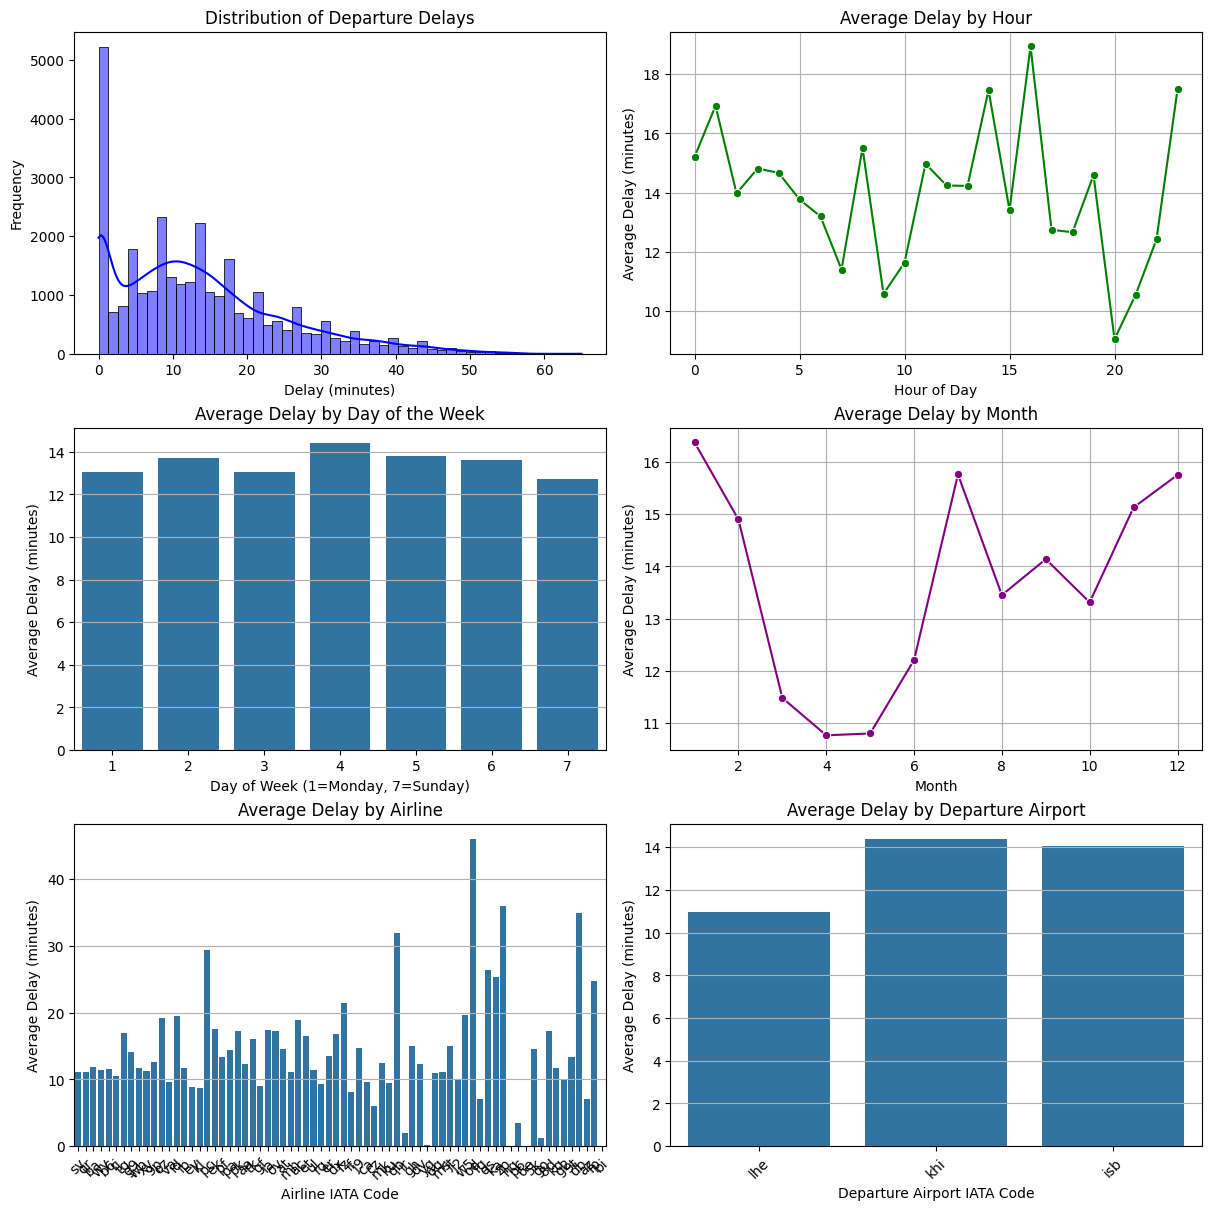

In [111]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), constrained_layout=True)

# Plot 1: Delay Distribution
sns.histplot(df['departure.delay'], bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Departure Delays', fontsize=12)
axes[0, 0].set_xlabel('Delay (minutes)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)

# Plot 2: Average Delay by Hour
sns.lineplot(ax=axes[0, 1], x='hour', y='departure.delay', data=df, estimator='mean', errorbar=None, marker='o', color='green')
axes[0, 1].set_title('Average Delay by Hour', fontsize=12)
axes[0, 1].set_xlabel('Hour of Day', fontsize=10)
axes[0, 1].set_ylabel('Average Delay (minutes)', fontsize=10)
axes[0, 1].grid()

# Plot 3: Average Delay by Day
sns.barplot(ax=axes[1, 0], x='day', y='departure.delay', data=df, estimator='mean', errorbar=None)
axes[1, 0].set_title('Average Delay by Day of the Week', fontsize=12)
axes[1, 0].set_xlabel('Day of Week (1=Monday, 7=Sunday)', fontsize=10)
axes[1, 0].set_ylabel('Average Delay (minutes)', fontsize=10)
axes[1, 0].grid(axis='y')

# Plot 4: Average Delay by Month
sns.lineplot(ax=axes[1, 1], x='month', y='departure.delay', data=df, estimator='mean', errorbar=None, marker='o', color='purple')
axes[1, 1].set_title('Average Delay by Month', fontsize=12)
axes[1, 1].set_xlabel('Month', fontsize=10)
axes[1, 1].set_ylabel('Average Delay (minutes)', fontsize=10)
axes[1, 1].grid()

# Plot 5: Average Delay by Airline
sns.barplot(ax=axes[2, 0], x='airline.iataCode', y='departure.delay', data=df, estimator='mean', errorbar=None)
axes[2, 0].set_title('Average Delay by Airline', fontsize=12)
axes[2, 0].set_xlabel('Airline IATA Code', fontsize=10)
axes[2, 0].set_ylabel('Average Delay (minutes)', fontsize=10)
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(axis='y')

# Plot 6: Average Delay by Departure Airport
sns.barplot(ax=axes[2, 1], x='departure.iataCode', y='departure.delay', data=df, estimator='mean', errorbar=None)
axes[2, 1].set_title('Average Delay by Departure Airport', fontsize=12)
axes[2, 1].set_xlabel('Departure Airport IATA Code', fontsize=10)
axes[2, 1].set_ylabel('Average Delay (minutes)', fontsize=10)
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].grid(axis='y')

plt.show()

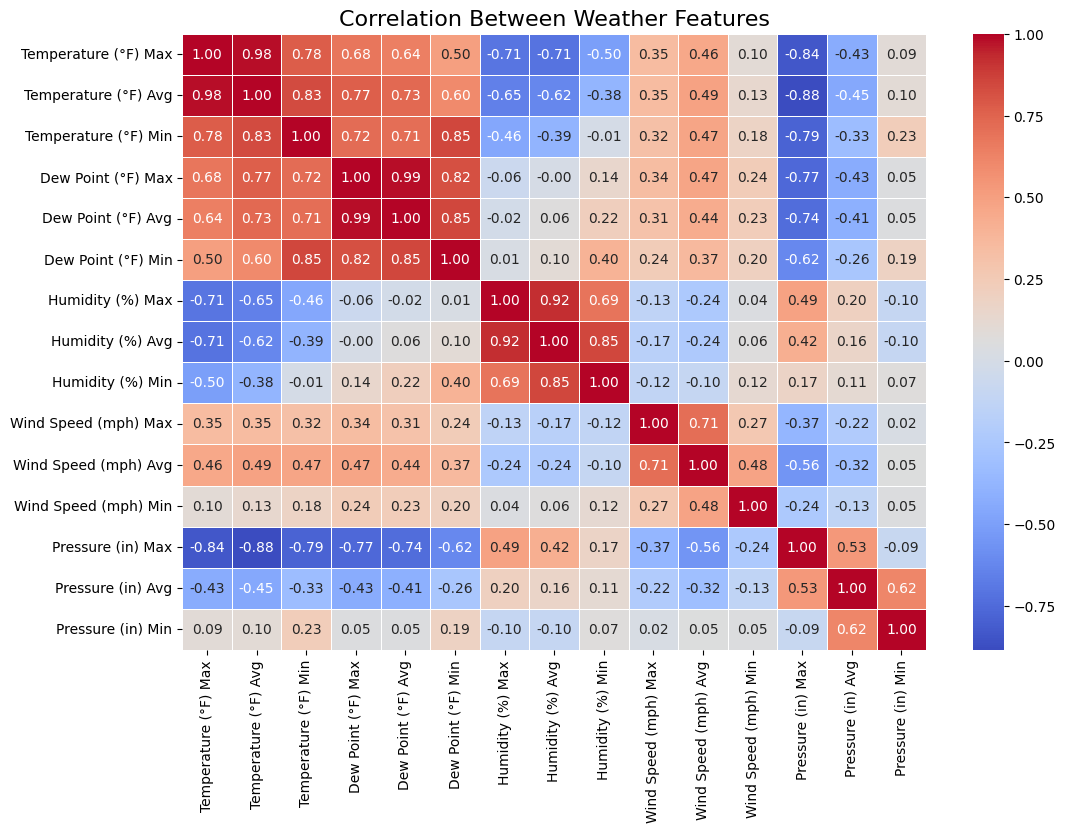

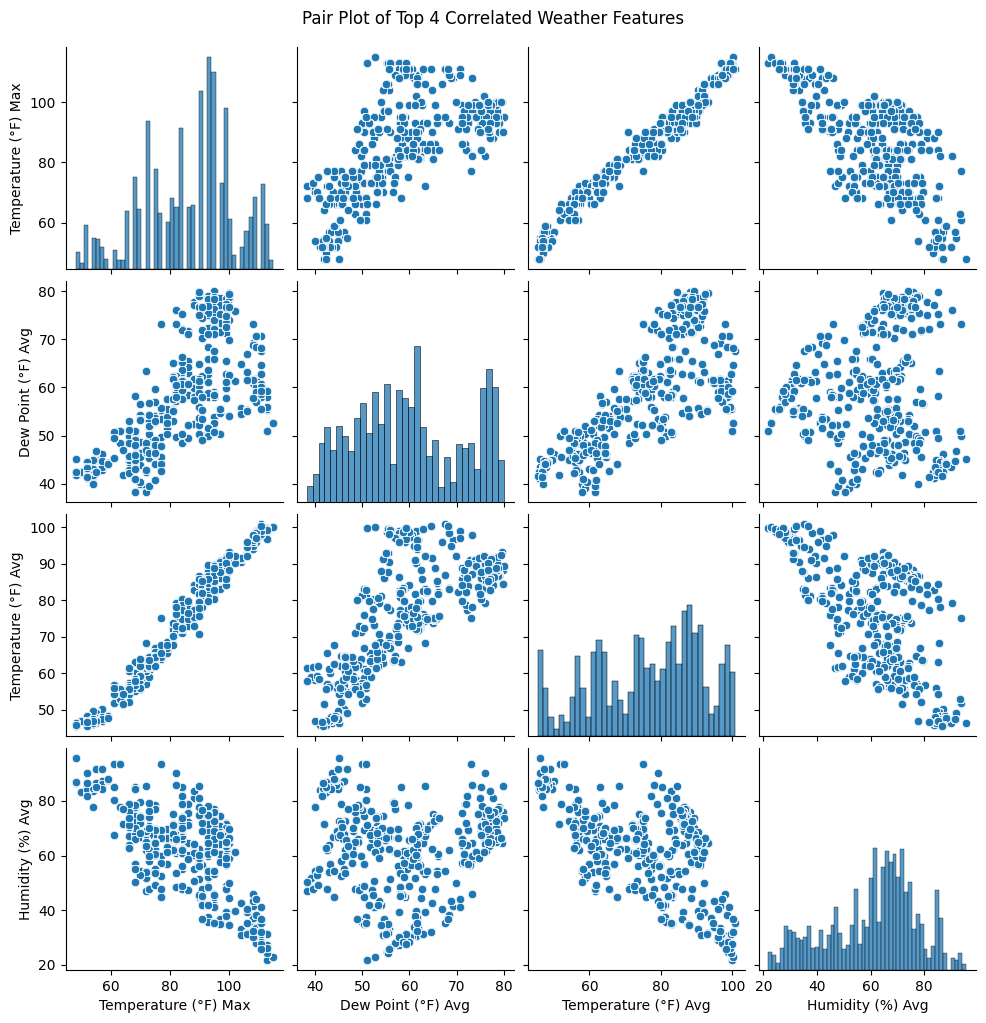

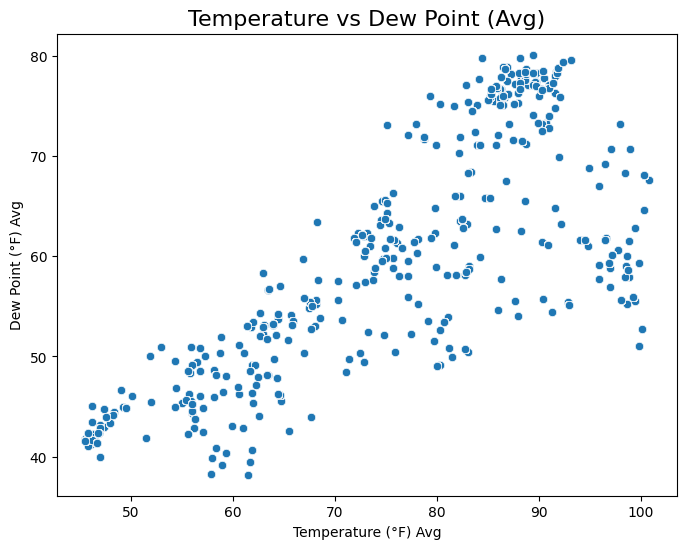

In [125]:
corrFeatures = [
    'Temperature (°F) Max','Temperature (°F) Avg', 'Temperature (°F) Min', 
    'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min', 'Humidity (%) Max', 
    'Humidity (%) Avg', 'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg', 
    'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg', 'Pressure (in) Min',
]

correlMatrix = df[corrFeatures].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlMatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Weather Features', fontsize=16)
plt.show()

topfeats = correlMatrix.unstack().sort_values(ascending=False).drop_duplicates()
topfeats = [feature[0] for feature in topfeats.index[:4]]

sns.pairplot(df[topfeats])
plt.suptitle('Pair Plot of Top 4 Correlated Weather Features', y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Temperature (°F) Avg'], y=df['Dew Point (°F) Avg'])
plt.title('Temperature vs Dew Point (Avg)', fontsize=16)
plt.xlabel('Temperature (°F) Avg')
plt.ylabel('Dew Point (°F) Avg')
plt.show()

# **Phase 3: Analytical and Predictive Tasks**

### **Binary Classification**

- Classify flights as on-time or delayed based on the following criteria:
	- delay = 0: on-time
	- delay > 0: delayed

> Training

In [2]:
binary = pd.read_csv('Data/trainer2.csv')
binary.drop(columns=['departure.scheduledTime','departure.actualTime', 'arrival.estimatedTime'], inplace = True)

Confusion Matrix:


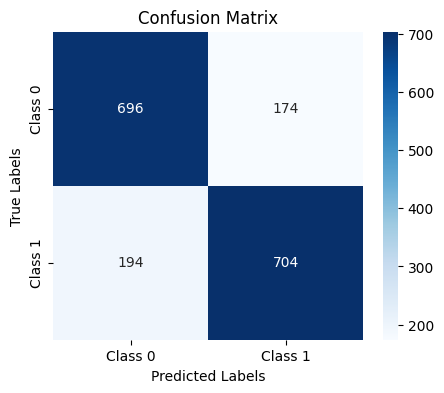


Accuracy: 79.18552036199095%

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       870
           1       0.80      0.78      0.79       898

    accuracy                           0.79      1768
   macro avg       0.79      0.79      0.79      1768
weighted avg       0.79      0.79      0.79      1768


Precision-Recall Curve:
Precision: [0.50791855 0.51197263 0.52148664 0.52916912 0.53548002 0.53938665
 0.54528875 0.55076923 0.55493482 0.56022585 0.56198867 0.57042254
 0.57707254 0.58311518 0.58668425 0.59771659 0.60682594 0.60992419
 0.61463415 0.61646728 0.62295082 0.6325345  0.63656388 0.64110201
 0.64723694 0.6587057  0.66329705 0.66850394 0.67252396 0.67689822
 0.68468468 0.6898263  0.6986532  0.70169492 0.7084048  0.7141616
 0.71858407 0.72252252 0.72702457 0.7320442  0.73876404 0.74641148
 0.75169738 0.75518263 0.76767677 0.775154   0.77905759 0.78487753
 0.78902045 0.79321663 0.79799107 0.80182232 0.8

In [3]:
binary['delayed'] = binary['departure.delay'].apply(lambda x: 1 if x > 0 else 0)
correlColumns = [
    'Temperature (°F) Max', 'flight.number',
	'Temperature (°F) Avg', 'Temperature (°F) Min', 
    'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min', 'Humidity (%) Max', 
    'Humidity (%) Avg', 'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg', 
    'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg', 'Pressure (in) Min',
    'hour', 'day', 'month', 'year'
]
categorical = ['type', 'status', 'departure.iataCode', 'departure.icaoCode', 'arrival.iataCode', 'arrival.icaoCode']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False)
encodedTrain = encoder.fit_transform(binary[categorical])
encData = pd.DataFrame(encodedTrain, columns=encoder.get_feature_names_out(categorical))

binary = binary.drop(columns=categorical)
finalData = pd.concat([binary[correlColumns + ['delayed']], encData], axis=1)
finalData = finalData.dropna(subset=['delayed'])

# Balancing Data
class0 = finalData[finalData['delayed'] == 0]
class1 = finalData[finalData['delayed'] == 1]
mapping = resample(class1, replace = True, n_samples = len(class0), random_state = 42)

balanced = pd.concat([class0, mapping])
balanced = balanced.sample(frac=1, random_state=42).reset_index(drop=True)
# Balancing Data

y = balanced['delayed']
X = balanced.drop(columns=['delayed'])

scaler = StandardScaler()
numericalCols = X[correlColumns].select_dtypes(include=['int64','float64']).columns
X[correlColumns] = scaler.fit_transform(X[numericalCols])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

confusionMat = confusion_matrix(ytest, predictions)
print('Confusion Matrix:')
# print(confusionMat)

plt.figure(figsize=(5, 4))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Labeling the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

accuracy = accuracy_score(ytest, predictions)
print('\nAccuracy: ' + str(accuracy * 100) + '%')

report = classification_report(ytest, predictions)
print('\nClassification Report:')
print(report)

precision, recall, _ = precision_recall_curve(ytest, model.predict_proba(xtest)[:, 1])
print('\nPrecision-Recall Curve:')
print('Precision:', precision)
print('Recall:', recall)

f1 = f1_score(ytest, predictions)
print('\nF1 Score:', f1)

print('\nClass-wise Precision-Recall:')
classwise_report = classification_report(ytest, predictions, output_dict=True)
for label, metrics in classwise_report.items():
    if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
        print(f'Class {label}:')
        print(f"  Precision: {metrics['precision']}")
        print(f"  Recall: {metrics['recall']}")
        print(f"  F1-Score: {metrics['f1-score']}")

> Testing

In [4]:
binaryTest = pd.read_csv('Data/tester.csv')

In [5]:
encodedTest = encoder.transform(binaryTest[categorical])
encTestData = pd.DataFrame(encodedTest, columns=encoder.get_feature_names_out(categorical))
finalTestData = pd.concat([binaryTest[correlColumns], encTestData], axis=1)

scaler = StandardScaler()
numericalCols = finalTestData[correlColumns].select_dtypes(include=['int64','float64']).columns
finalTestData[numericalCols] = scaler.fit_transform(finalTestData[numericalCols])
ypredictions = model.predict(finalTestData)

submission = pd.DataFrame({
    'ID': range(1, len(finalTestData) + 1),
    'Delay': ['on-time' if label == 0 else 'delayed' for label in ypredictions]
})

submission.to_csv('Results/binary2.csv', index=False)

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


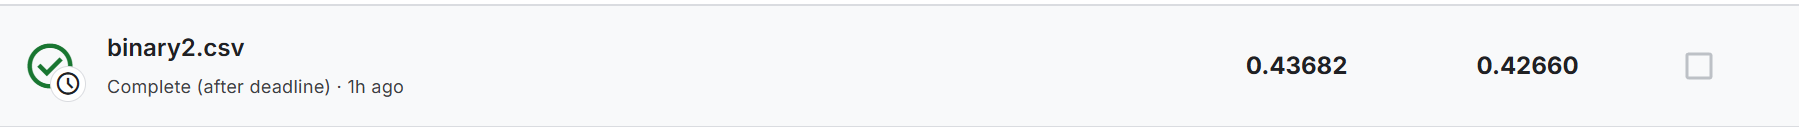

In [56]:
from IPython.display import Image

Image('Submissions/submissionBinary.png')

### **Multi-Class Classification**

- Categorize flights into:
	- No Delay (0 min)
	- Short Delay (<45 min)
	- Moderate Delay (45–175 min)
	- Long Delay (>175 min)

> Training

In [6]:
multi = pd.read_csv('Data/trainer2.csv')

Confusion Matrix:


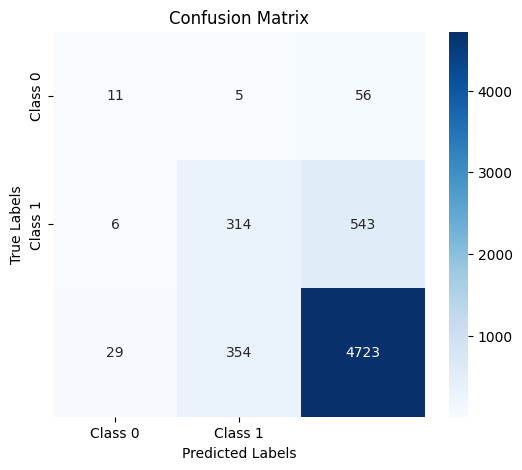


Accuracy: 83.56232411852342%

Classification Report:
                precision    recall  f1-score   support

Moderate Delay       0.24      0.15      0.19        72
      No Delay       0.47      0.36      0.41       863
   Short Delay       0.89      0.92      0.91      5106

      accuracy                           0.84      6041
     macro avg       0.53      0.48      0.50      6041
  weighted avg       0.82      0.84      0.83      6041


Precision-Recall for each class:
Class Moderate Delay:
  Precision: [0.01191856 0.05070423 0.05077574 0.05106383 0.04978663 0.05
 0.05028736 0.04927536 0.04992658 0.0504451  0.05182927 0.05045872
 0.05246423 0.05271565 0.05365854 0.05374593 0.05392157 0.05409836
 0.05418719 0.05445545 0.05882353 0.05892857 0.05903399 0.05924596
 0.05956679 0.05978261 0.05989111 0.06       0.06021898 0.06099815
 0.06111111 0.06122449 0.06226415 0.06238185 0.06346154 0.06358382
 0.06370656 0.06407767 0.06432749 0.06457926 0.06483301 0.06496063
 0.06508876 0.06521

In [7]:
def Categorize(x):
    if x == 0:
        return 'No Delay'
    elif 0 < x < 45:
        return 'Short Delay'
    elif 45 <= x <= 175:
        return 'Moderate Delay'
    else:
        return 'Long Delay'

correlColumns = [
    'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min', 'Humidity (%) Max', 
    'Humidity (%) Avg', 'Humidity (%) Min', 'hour', 'day'
]
categorical = ['departure.iataCode', 'departure.icaoCode', 'arrival.iataCode', 'arrival.icaoCode']

multi['delay_category'] = multi['departure.delay'].apply(Categorize)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

encoded_train = encoder.fit_transform(multi[categorical])
encoded_data = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical))
finalData = pd.concat([multi.drop(columns=categorical), encoded_data], axis=1)

finalData = finalData[correlColumns + ['delay_category']]
finalData = finalData.dropna(subset=['delay_category'])

y = finalData['delay_category']
X = finalData.drop(columns=['delay_category'])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)
confusionMat = confusion_matrix(ytest, predictions)

print('Confusion Matrix:')
# print(confusionMat)

plt.figure(figsize=(6, 5))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

accuracy = accuracy_score(ytest, predictions)
print('\nAccuracy: ' + str(accuracy * 100) + '%')

report = classification_report(ytest, predictions)
print('\nClassification Report:')
print(report)

print('\nPrecision-Recall for each class:')
for i, label in enumerate(model.classes_):
    precision, recall, _ = precision_recall_curve(ytest == label, model.predict_proba(xtest)[:, i])
    print(f'Class {label}:')
    print(f'  Precision: {precision}')
    print(f'  Recall: {recall}')

f1 = f1_score(ytest, predictions, average=None, labels=model.classes_)
print('\nF1 Score for each class:')
for i, label in enumerate(model.classes_):
    print(f'Class {label}: {f1[i]}')

> Testing

In [164]:
multiTest = pd.read_csv('Data/tester.csv')

In [165]:
encodedTest = encoder.transform(multiTest[categorical])
encTestData = pd.DataFrame(encodedTest, columns=encoder.get_feature_names_out(categorical))

finalTestData = pd.concat([multiTest.drop(columns=categorical), encTestData], axis=1)
finalTestData = finalTestData[correlColumns]

ypredictions = model.predict(finalTestData)
ypredictions = ypredictions[:12914]

submission = pd.DataFrame({
    'ID': range(1, len(ypredictions) + 1),
    'Delay': [label for label in ypredictions]
})

submission.to_csv('Results/multi.csv', index=False)

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


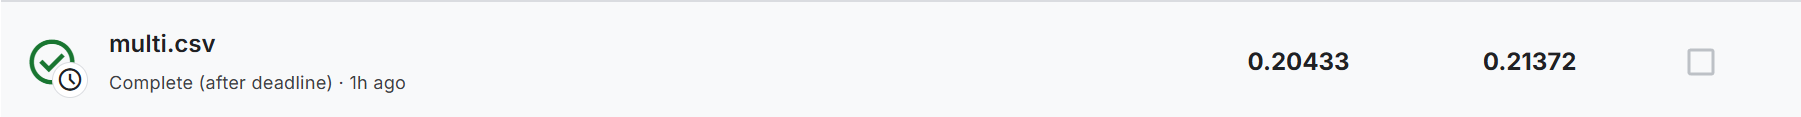

In [57]:
from IPython.display import Image

Image('Submissions/submissionMulti.png')

###  **Regression Training**

Predict the exact delay duration for each flight.
1. Train one regression model.
2. Validate models using cross-validation techniques.
3. Evaluate performance using:
	1. Mean Absolute Error (MAE)
	2. Root Mean Square Error (RMSE)

> Training

In [49]:
regression = pd.read_csv('Data/trainer2.csv')

In [42]:
correlColumns = [
    'Temperature (°F) Max', 'flight.number',
	'Temperature (°F) Avg', 'Temperature (°F) Min', 
    'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min', 'Humidity (%) Max', 
    'Humidity (%) Avg', 'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg', 
    'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg', 'Pressure (in) Min',
    'hour', 'day', 'month', 'year'
]
categorical = ['type', 'status', 'departure.iataCode', 'departure.icaoCode', 'arrival.iataCode', 'arrival.icaoCode']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encodedTrain = encoder.fit_transform(regression[categorical])
encData = pd.DataFrame(encodedTrain, columns=encoder.get_feature_names_out(categorical))

regression = regression.drop(columns=categorical)
finalData = pd.concat([regression[correlColumns + ['departure.delay']], encData], axis=1)
finalData = finalData.dropna(subset=['departure.delay'])

y = finalData['departure.delay']
X = finalData.drop(columns=['departure.delay'])

scaler = StandardScaler()
X[correlColumns] = scaler.fit_transform(X[correlColumns])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(xtrain, ytrain)

predictions = model.predict(xtest)
mae = mean_absolute_error(ytest, predictions)
rmse = np.sqrt(mean_squared_error(ytest, predictions))

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 5.855884787286874
Root Mean Squared Error (RMSE): 8.404336446981045


> Validate models using cross-validation techniques.

In [43]:
meanAvg = make_scorer(mean_absolute_error)
meanAvgScores = cross_val_score(model, X, y, cv=5, scoring=meanAvg)

print("Validation MAE Scores from Cross-Validation:", meanAvgScores)
print("Average Validation MAE:", np.mean(meanAvgScores))

rootMean = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
rootMeanScores = cross_val_score(model, X, y, cv=5, scoring=rootMean)

print("Validation RMSE Scores from Cross-Validation:", rootMeanScores)
print("Average Validation RMSE:", np.mean(rootMeanScores))

Validation MAE Scores from Cross-Validation: [8.24491972 7.76080119 8.48899851 8.59152789 8.28404072]
Average Validation MAE: 8.274057606356564
Validation RMSE Scores from Cross-Validation: [10.32978651 10.13916774 10.79264396 10.67840599 10.47201309]
Average Validation RMSE: 10.482403455834907


> Testing

In [44]:
regressionTest = pd.read_csv('Data/tester.csv')

In [45]:
encodedTest = encoder.transform(regressionTest[categorical])
encTestData = pd.DataFrame(encodedTest, columns=encoder.get_feature_names_out(categorical))
finalTestData = pd.concat([regressionTest[correlColumns], encTestData], axis=1)

finalTestData[correlColumns] = scaler.transform(finalTestData[correlColumns])
ypredictions = model.predict(finalTestData)

submission = pd.DataFrame({
    'ID': range(1, len(finalTestData) + 1),
    'Delay': ypredictions
})

submission.to_csv('Results/regression.csv', index=False)

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


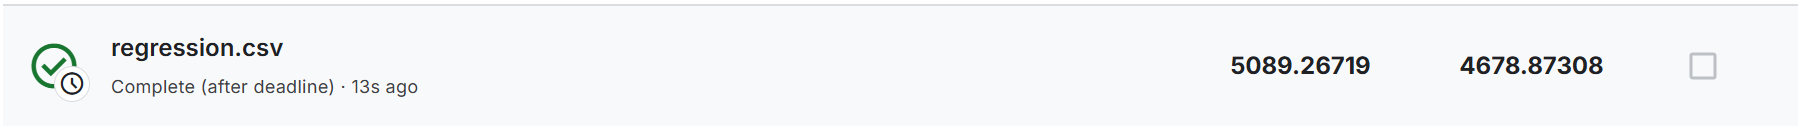

In [58]:
from IPython.display import Image

Image('Submissions/submissionRegression.png')

# **Phase 4: Model Optimization and Evaluation**

1. Hyperparameter Tuning:
	- Use techniques like grid search or random search to optimize predictive models.
2. Validation:
	- Apply k-fold cross-validation to assess model performance.
3. Model Comparison:
	- Compare the models.

### **Binary Classification**

In [54]:
binary = pd.read_csv('Data/trainer2.csv')
binary.drop(columns=['departure.scheduledTime','departure.actualTime', 'arrival.estimatedTime'], inplace = True)

binary['delayed'] = binary['departure.delay'].apply(lambda x: 1 if x > 0 else 0)
correlColumns = [
    'Temperature (°F) Max', 'flight.number', 'Temperature (°F) Avg', 'Temperature (°F) Min', 
    'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min', 'Humidity (%) Max', 
    'Humidity (%) Avg', 'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg', 
    'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg', 'Pressure (in) Min',
    'hour', 'day', 'month', 'year'
]
categorical = ['type', 'status', 'departure.iataCode', 'departure.icaoCode', 'arrival.iataCode', 'arrival.icaoCode']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encodedTrain = encoder.fit_transform(binary[categorical])
encData = pd.DataFrame(encodedTrain, columns=encoder.get_feature_names_out(categorical))

binary = binary.drop(columns=categorical)
finalData = pd.concat([binary[correlColumns + ['delayed']], encData], axis=1)
finalData = finalData.dropna(subset=['delayed'])

class0 = finalData[finalData['delayed'] == 0]
class1 = finalData[finalData['delayed'] == 1]
mapping = resample(class1, replace=True, n_samples=len(class0), random_state=42)

balanced = pd.concat([class0, mapping])
balanced = balanced.sample(frac=1, random_state=42).reset_index(drop=True)

y = balanced['delayed']
X = balanced.drop(columns=['delayed'])

scaler = StandardScaler()
numericalCols = X[correlColumns].select_dtypes(include=['int64', 'float64']).columns
X[correlColumns] = scaler.fit_transform(X[numericalCols])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

> Hyperparameter Tuning

In [ ]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, verbose=3, random_state=42)
random_search.fit(xtrain, ytrain)

print("Best Parameters from Random Search:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

best_model = random_search.best_estimator_
predictions = best_model.predict(xtest)

confusionMat = confusion_matrix(ytest, predictions)
print('Confusion Matrix:')
print(confusionMat)

accuracy = accuracy_score(ytest, predictions)
print('\nAccuracy: ' + str(accuracy * 100) + '%')

report = classification_report(ytest, predictions)
print('\nClassification Report:')
print(report)

precision, recall, _ = precision_recall_curve(ytest, best_model.predict_proba(xtest)[:, 1])
print('\nPrecision-Recall Curve:')
print('Precision:', precision)
print('Recall:', recall)

f1 = f1_score(ytest, predictions)
print('\nF1 Score:', f1)

print('\nClass-wise Precision-Recall:')
classwise_report = classification_report(ytest, predictions, output_dict=True)
for label, metrics in classwise_report.items():
    if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
        print(f'Class {label}:')
        print(f"  Precision: {metrics['precision']}")
        print(f"  Recall: {metrics['recall']}")
        print(f"  F1-Score: {metrics['f1-score']}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.750 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.719 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.699 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.711 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.728 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=763;, score=0.756 total time=   3.0s
[CV 2/5] END bootst

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-p

Best Parameters from Random Search: {'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 485}
Best Accuracy Score: 0.7685329497462942
Confusion Matrix:
[[678 192]
 [206 692]]

Accuracy: 77.48868778280543%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       870
           1       0.78      0.77      0.78       898

    accuracy                           0.77      1768
   macro avg       0.77      0.77      0.77      1768
weighted avg       0.78      0.77      0.77      1768


Precision-Recall Curve:
Precision: [0.50791855 0.508206   0.50849377 ... 1.         1.         1.        ]
Recall: [1.         1.         1.         ... 0.00222717 0.00111359 0.        ]

F1 Score: 0.77665544332211

Class-wise Precision-Recall:
Class 0:
  Precision: 0.7669683257918553
  Recall: 0.7793103448275862
  F1-Score: 0.77309007981756
Class 1:
  Precision: 0.78

> Testing

In [61]:
binaryTest = pd.read_csv('Data/tester.csv')

encodedTest = encoder.transform(binaryTest[categorical])
encTestData = pd.DataFrame(encodedTest, columns=encoder.get_feature_names_out(categorical))
finalTestData = pd.concat([binaryTest[correlColumns], encTestData], axis=1)

scaler = StandardScaler()
numericalCols = finalTestData[correlColumns].select_dtypes(include=['int64','float64']).columns
finalTestData[numericalCols] = scaler.fit_transform(finalTestData[numericalCols])
ypredictions = best_model.predict(finalTestData)

submission = pd.DataFrame({
    'ID': range(1, len(finalTestData) + 1),
    'Delay': ['on-time' if label == 0 else 'delayed' for label in ypredictions]
})

submission.to_csv('Results/binaryHyper.csv', index=False)

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


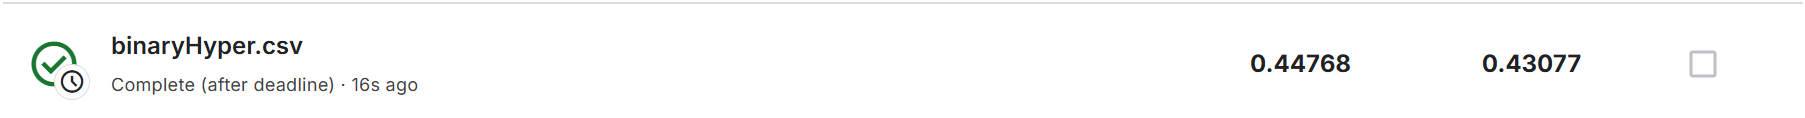

In [62]:
from IPython.display import Image

Image('Submissions/submissionBinaryHyper.png')

### **Multi-Class Classification**

In [82]:
multi = pd.read_csv('Data/trainer2.csv')

def Categorize(x):
    if x == 0:
        return 'No Delay'
    elif 0 < x < 45:
        return 'Short Delay'
    elif 45 <= x <= 175:
        return 'Moderate Delay'
    else:
        return 'Long Delay'

multi['delay_category'] = multi['departure.delay'].apply(Categorize)
categorical = ['type', 'status', 'departure.iataCode', 'departure.icaoCode', 'arrival.iataCode', 'arrival.icaoCode']
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

encoded_train = encoder.fit_transform(multi[categorical])
encoded_data = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical))
finalData = pd.concat([multi.drop(columns=categorical), encoded_data], axis=1)

finalData = finalData[correlColumns + ['delay_category']]
finalData = finalData.dropna(subset=['delay_category'])

y = finalData['delay_category']
X = finalData.drop(columns=['delay_category'])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=5, verbose=3, random_state=42)
random_search.fit(xtrain, ytrain)

print("Best Parameters from Random Search:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

best_model = random_search.best_estimator_
predictions = best_model.predict(xtest)

confusionMat = confusion_matrix(ytest, predictions)
print('Confusion Matrix:')
print(confusionMat)

accuracy = accuracy_score(ytest, predictions)
print('\nAccuracy: ' + str(accuracy * 100) + '%')

report = classification_report(ytest, predictions)
print('\nClassification Report:')
print(report)

y_binarized = label_binarize(ytest, classes=best_model.classes_)
precision, recall, _ = precision_recall_curve(y_binarized.ravel(), best_model.predict_proba(xtest).ravel())

print('\nPrecision-Recall Curve:')
print('Precision:', precision)
print('Recall:', recall)

f1 = f1_score(ytest, predictions, average='weighted')
print('\nF1 Score:', f1)

print('\nClass-wise Precision-Recall:')
classwise_report = classification_report(ytest, predictions, output_dict=True)
for label, metrics in classwise_report.items():
    if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
        print(f'Class {label}:')
        print(f"  Precision: {metrics['precision']}")
        print(f"  Recall: {metrics['recall']}")
        print(f"  F1-Score: {metrics['f1-score']}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.845 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.843 total time=   4.2s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.842 total time=   6.0s
[CV 4/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.845 total time=   7.2s
[CV 5/5] END bootstrap=True, max_depth=15, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=221;, score=0.843 total time=   7.0s
[CV 1/5] END bootstrap=True, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=763;, score=0.843 total time=  21.5s
[CV 2/5] END bootstr

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

Best Parameters from Random Search: {'bootstrap': False, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 871}
Best Accuracy Score: 0.8456794691024593
Confusion Matrix:
[[   2    1   69]
 [   0  130  733]
 [   0   60 5046]]

Accuracy: 85.71428571428571%

Classification Report:
                precision    recall  f1-score   support

Moderate Delay       1.00      0.03      0.05        72
      No Delay       0.68      0.15      0.25       863
   Short Delay       0.86      0.99      0.92      5106

      accuracy                           0.86      6041
     macro avg       0.85      0.39      0.41      6041
  weighted avg       0.84      0.86      0.81      6041


Precision-Recall Curve:
Precision: [0.33333333 0.33351736 0.33355419 ... 1.         1.         1.        ]
Recall: [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.31071015e-04
 1.65535507e-04 0.00000000e+00]

F1 Score: 0.8145954543333139

Class-wise Precision-Recall

> Testing

In [88]:
multiTest = pd.read_csv('Data/tester.csv')

encodedTest = encoder.transform(multiTest[categorical])
encTestData = pd.DataFrame(encodedTest, columns=encoder.get_feature_names_out(categorical))

finalTestData = pd.concat([multiTest.drop(columns=categorical), encTestData], axis=1)
finalTestData = finalTestData[correlColumns]

ypredictions = best_model.predict(finalTestData)
ypredictions = ypredictions[:12914]

submission = pd.DataFrame({
    'ID': range(1, len(ypredictions) + 1),
    'Delay': [label for label in ypredictions]
})

submission.to_csv('Results/multiHyper.csv', index=False)

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


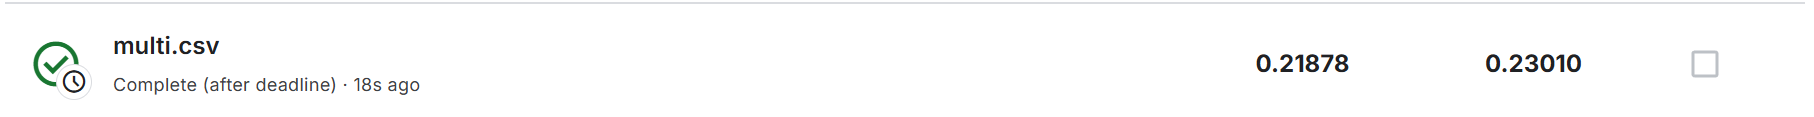

In [166]:
from IPython.display import Image

Image('Submissions/submissionMultiHyper.png')

### **Random Forest Regressor**

In [102]:
regression = pd.read_csv('Data/trainer2.csv')

correlColumns = [
    'Temperature (°F) Max', 'flight.number',
	'Temperature (°F) Avg', 'Temperature (°F) Min', 
    'Dew Point (°F) Max', 'Dew Point (°F) Avg', 'Dew Point (°F) Min', 'Humidity (%) Max', 
    'Humidity (%) Avg', 'Humidity (%) Min', 'Wind Speed (mph) Max', 'Wind Speed (mph) Avg', 
    'Wind Speed (mph) Min', 'Pressure (in) Max', 'Pressure (in) Avg', 'Pressure (in) Min',
    'hour', 'day', 'month', 'year'
]
categorical = ['type', 'status', 'departure.iataCode', 'departure.icaoCode', 'arrival.iataCode', 'arrival.icaoCode']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encodedTrain = encoder.fit_transform(regression[categorical])
encData = pd.DataFrame(encodedTrain, columns=encoder.get_feature_names_out(categorical))

regression = regression.drop(columns=categorical)
finalData = pd.concat([regression[correlColumns + ['departure.delay']], encData], axis=1)
finalData = finalData.dropna(subset=['departure.delay'])

y = finalData['departure.delay']
X = finalData.drop(columns=['departure.delay'])

scaler = StandardScaler()
X[correlColumns] = scaler.fit_transform(X[correlColumns])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, verbose=3, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(xtrain, ytrain)

best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

predictions = best_model.predict(xtest)
mae = mean_absolute_error(ytest, predictions)
rmse = np.sqrt(mean_squared_error(ytest, predictions))

print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-79.302 total time=  38.0s
[CV 2/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-80.853 total time=  39.1s
[CV 3/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-84.997 total time=  39.7s
[CV 4/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-81.089 total time=  40.8s
[CV 5/5] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-78.250 total time=  54.6s
[CV 1/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-103.129 total time=  53.8s
[CV 2/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-106.2

In [ ]:
regressionTest = pd.read_csv('Data/tester.csv')

encodedTest = encoder.transform(regressionTest[categorical])
encTestData = pd.DataFrame(encodedTest, columns=encoder.get_feature_names_out(categorical))
finalTestData = pd.concat([regressionTest[correlColumns], encTestData], axis=1)

finalTestData[correlColumns] = scaler.transform(finalTestData[correlColumns])
ypredictions = best_model.predict(finalTestData)

submission = pd.DataFrame({
    'ID': range(1, len(finalTestData) + 1),
    'Delay': ypredictions
})

submission.to_csv('Results/regressionHyper.csv', index=False)

C:\Users\safwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


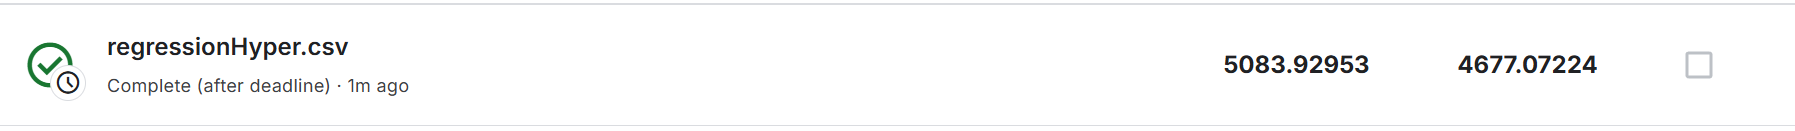

In [106]:
from IPython.display import Image

Image('Submissions/submissionRegressionHyper.png')